In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('classic')

import os
import cv2
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
Dataset_Gambar = '/content/drive/MyDrive/trainingBaruokt/'

CEK GAMBARRR
`

In [ ]:
#melakukan load mata tertutup
X = []
Y = []
#size seluruh gambar yang dibaca diresize menjadi 32 untuk keperluan model CNN
size = 32

mata_tertutup = os.listdir(Dataset_Gambar + 'Closed_Eyes/')
for i, nama_gambar in enumerate(mata_tertutup):   
    #hanya file format png yang akan dibaca
    if  (nama_gambar.split('.')[1] == 'png') :
        image = cv2.imread(Dataset_Gambar + 'Closed_Eyes/' + nama_gambar)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((size, size))
        X.append(np.array(image))
        #melabeli seluruh gambar mata tertutup dengan array 0
        Y.append(0)

In [ ]:
print(len(mata_tertutup))

2399


In [ ]:
#melakukan load pada gambar mata terbuka
mata_terbuka = os.listdir(Dataset_Gambar + 'Open_Eyes/')
for i, nama_gambar in enumerate(mata_terbuka):
    if (nama_gambar.split('.')[1] == 'png'):
          #hanya file format png yang akan dibaca
        image = cv2.imread(Dataset_Gambar + 'Open_Eyes/' + nama_gambar)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((size, size))
        X.append(np.array(image))
         #melabeli seluruh gambar mata tertutup dengan array 0
        Y.append(1)


FileNotFoundError: ignored

In [ ]:
print(len(mata_terbuka))

2816


In [ ]:

X = np.array(X)
y = np.array(Y)
#normalisasi gambar dengan skala 0-255, 0 untuk putih dan 255 untuk hitam
X=X/255

#data training dibagi secara random, dengan keperluan validasi 30% dan training 70%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


In [ ]:
#memastikan jumlah dan size gambar test
X_test.shape

(1390, 32, 32, 3)

In [ ]:
#memastikan jumlah dan size gambar training
X_train.shape

(3242, 32, 32, 3)

In [ ]:
#import untuk pembuatan arsitektur CNN menggunakan keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout, BatchNormalization
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

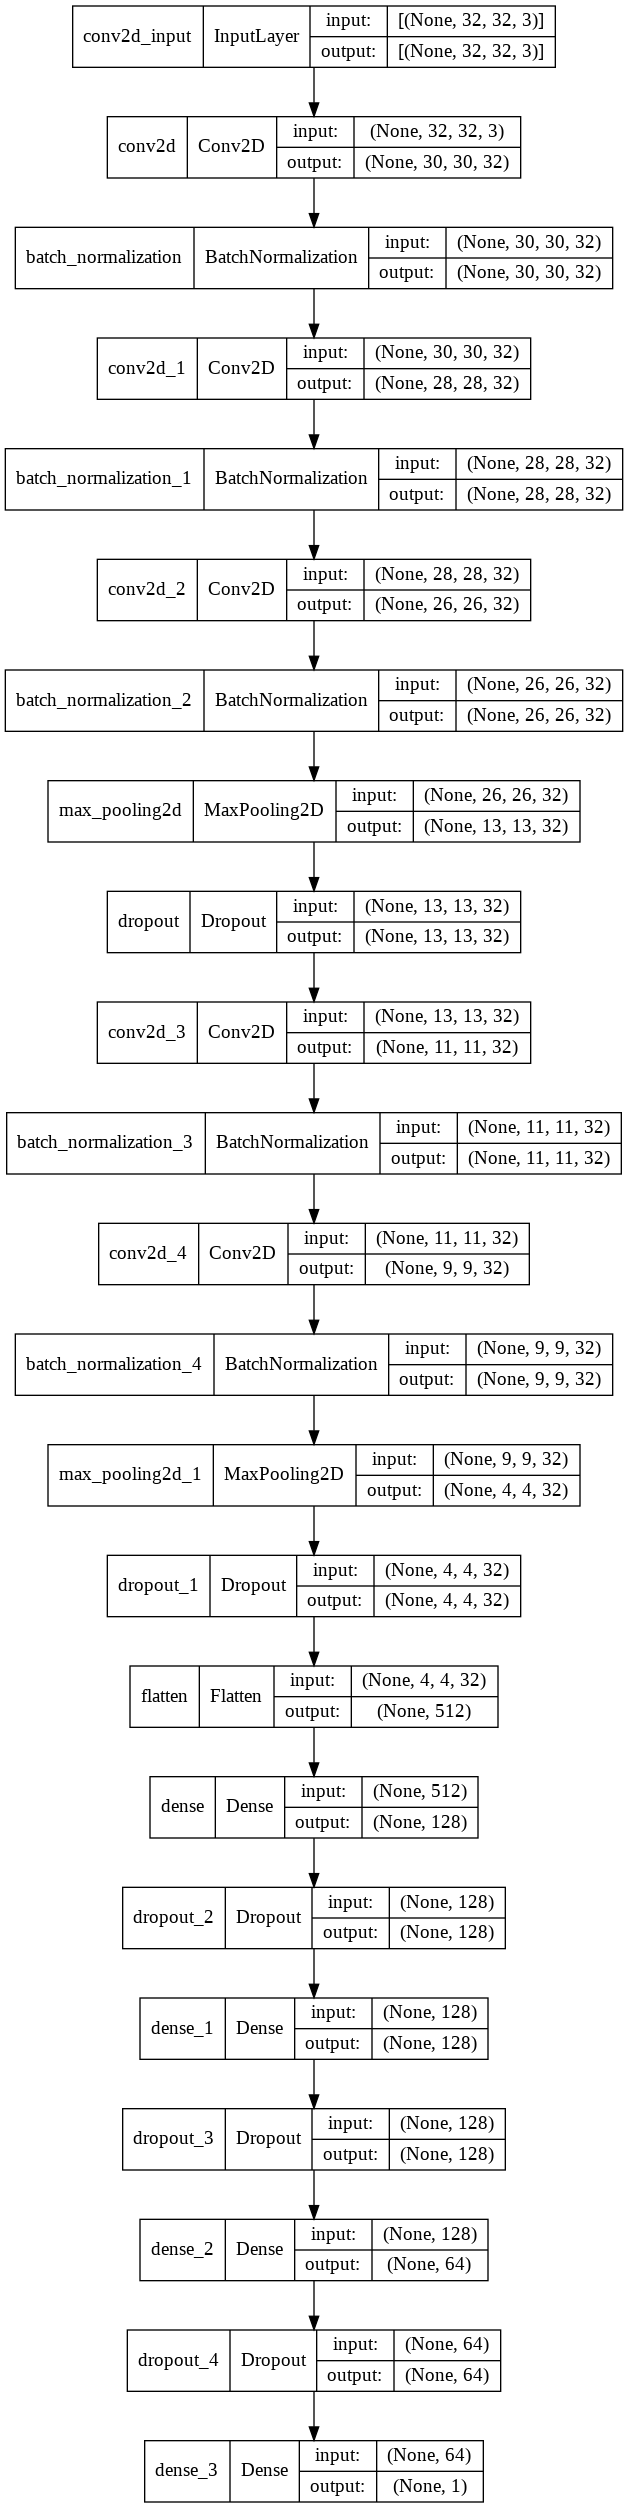

In [ ]:
#perancangan arsitektur CNN
from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Conv2D(
                filters = 32, 
                kernel_size = (3,3), 
                activation = 'relu', 
                input_shape = (32,32,3) 
                ))
model.add(BatchNormalization())
model.add(Conv2D(
                filters = 32, 
                kernel_size = (3,3), 
                activation = 'relu' 
                ))
model.add(BatchNormalization())
model.add(Conv2D(
                filters = 32, 
                kernel_size = (3,3), 
                activation = 'relu' 
                ))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2)) 




model.add(Conv2D(
                filters = 32, 
                kernel_size = (3,3), 
                activation = 'relu' 
                ))
model.add(BatchNormalization())
model.add(Conv2D(
                filters = 32, 
                kernel_size = (3,3), 
                activation = 'relu'  
                ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)) 

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation = 'sigmoid'))
#melakukan save arsitektur model CNN
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 batch_normalization_2 (Batc  (None, 26, 26, 32)       1

In [ ]:
#model diatur menggunakan binary crossentropy, adam optimizer, dan metrics accuracy
model.compile(loss="binary_crossentropy", optimizer = "Adam", metrics = ["accuracy"])

In [ ]:
#mendefinisikan training dengan grafik untuk keperluan pembuatan grafik akurasi dan loss
grafik = model.fit(X_train, 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 400,      
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )

Epoch 1/400
51/51 [==============================] - 11s 175ms/step - loss: 0.3864 - accuracy: 0.8242 - val_loss: 1.1528 - val_accuracy: 0.4388
Epoch 2/400
51/51 [==============================] - 9s 167ms/step - loss: 0.1606 - accuracy: 0.9414 - val_loss: 2.4677 - val_accuracy: 0.4388
Epoch 3/400
51/51 [==============================] - 9s 167ms/step - loss: 0.1059 - accuracy: 0.9655 - val_loss: 3.8327 - val_accuracy: 0.4388
Epoch 4/400
51/51 [==============================] - 8s 167ms/step - loss: 0.0625 - accuracy: 0.9796 - val_loss: 4.9193 - val_accuracy: 0.4388
Epoch 5/400
51/51 [==============================] - 9s 168ms/step - loss: 0.0607 - accuracy: 0.9800 - val_loss: 6.1051 - val_accuracy: 0.4388
Epoch 6/400
51/51 [==============================] - 9s 169ms/step - loss: 0.0624 - accuracy: 0.9790 - val_loss: 3.8938 - val_accuracy: 0.4489
Epoch 7/400
51/51 [==============================] - 8s 167ms/step - loss: 0.0488 - accuracy: 0.9843 - val_loss: 4.5336 - val_accuracy: 0.470

In [ ]:
model.save('custom_cnn400epochkedua.h5') 

Plotting accuracy versus epoch
model dievaluasi


ValueError: ignored

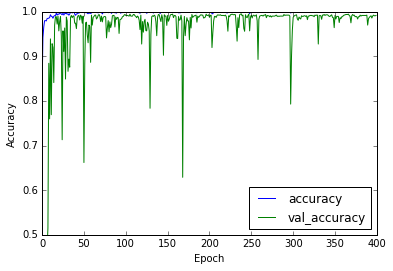

In [ ]:
#grafik akurasi dan validasi akurasi training
print("Plotting accuracy versus epoch")
plt.plot(grafik.history['accuracy'], label='accuracy')
plt.plot(grafik.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
print("model dievaluasi")
test_loss, test_acc = model.evaluate(X,Y)
print("Akurasi model yakni")
print(test_acc)

**LOSS**

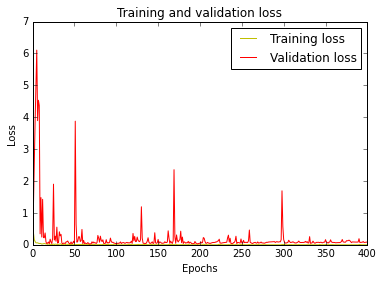

In [ ]:
#grafik loss seluruh epoch training
loss = grafik.history['loss']
val_loss = grafik.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Confusion Matrix

In [ ]:
#Setting threshold untuk mengetahui hasil prediksi confusion matrix mata tertutup dan mata terbuka
thresholdCNN=0.6
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_test)>= thresholdCNN).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)

[[603   7]
 [  5 775]]


Kurca ROC

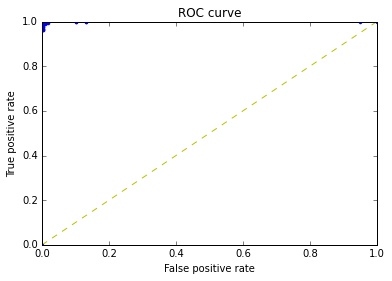

In [ ]:
#Menghitung false positive rate dan true positive rate menggunakan sk.learn
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()


Threshold Ideal

In [ ]:
#mencari threshold ideal dari model CNN menggunakan nilai FPR dan TPR
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]] 
print("threshold CNN ideal bernilai: ", ideal_roc_thresh['thresholds']) 

threshold CNN ideal bernilai:  12    0.970764
Name: thresholds, dtype: float32


In [ ]:
#menghitung nilai Area Under Curve dari hasil kurva ROC dengan data FPR dan TPR
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.9995281630937368
